In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load data
data = pd.read_csv("breast_cancer.csv")

print(data.isnull().sum())

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [135]:
# Compute the Z-score for each feature
z_scores = np.abs((data - data.mean()) / data.std())

# Find the rows that have at least one Z-score greater than 3 (common threshold for detecting outliers)
outliers = z_scores[(z_scores > 3).any(axis=1)]

# Print the number of outliers found and removed
print(f"Number of outliers found: {len(outliers)}")

Number of outliers found: 51


In [136]:
# Replace class labels with 0 and 1
data['Class'] = data['Class'].map({2: 0, 4: 1})

#Normalize features
X = data.iloc[:, :-1].values
y = data.iloc[:, -2]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
print()

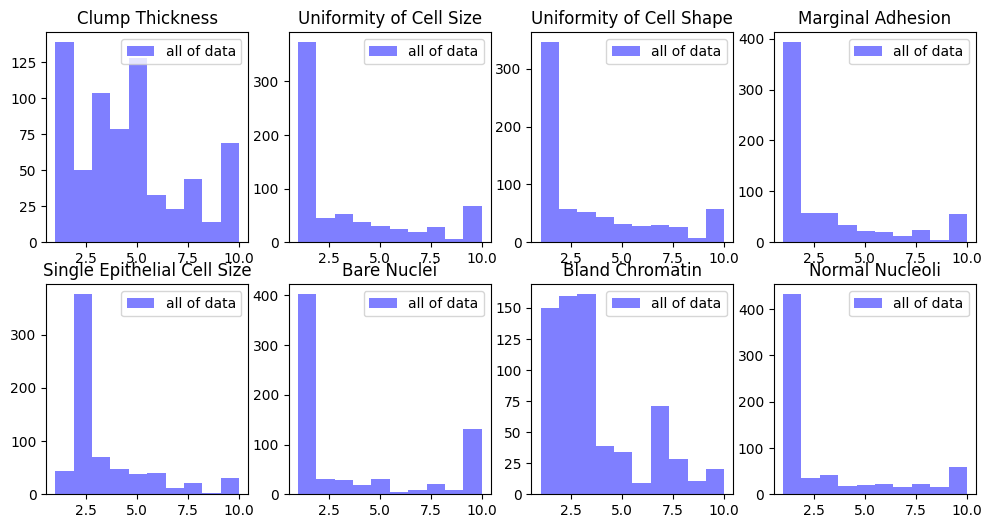

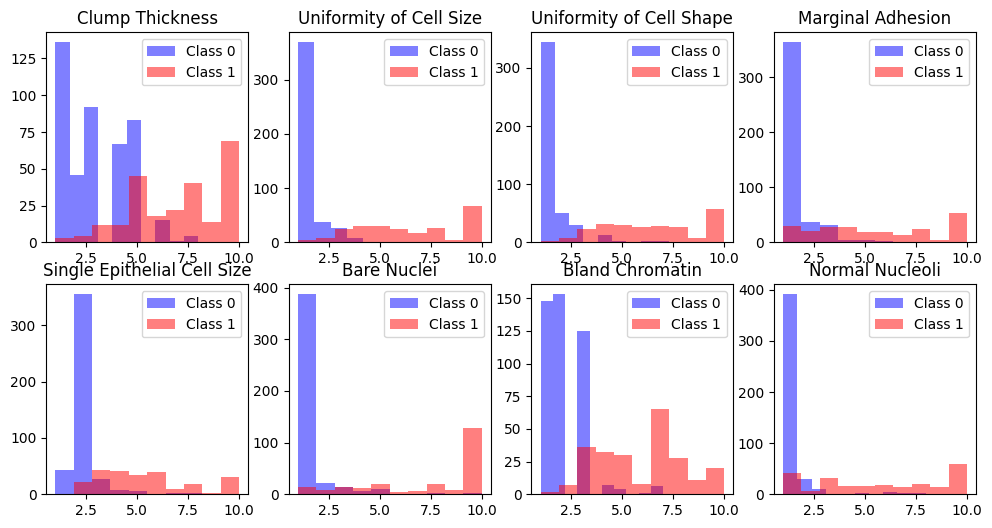

In [137]:
# Create a figure with 8 subplots
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# Set the title for each subplot
for i in range(2):
    for j in range(4):
        axs[i, j].set_title(data.columns[i * 4 + j])

# Plot the histogram for each feature in each subplot
for i in range(2):
    for j in range(4):
        axs[i, j].hist(data.iloc[:, i * 4 + j], alpha=0.5, color='blue', label='all of data')
        axs[i, j].legend()

# Show the plot
plt.show()

# Separate the dataset based on class
df_class_0 = data[data['Class'] == 0]
df_class_1 = data[data['Class'] == 1]

# Create a figure with 8 subplots
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# Set the title for each subplot
for i in range(2):
    for j in range(4):
        axs[i, j].set_title(data.columns[i * 4 + j])

# Plot the histogram for each feature in each subplot
for i in range(2):
    for j in range(4):
        axs[i, j].hist(df_class_0.iloc[:, i * 4 + j], alpha=0.5, color='blue', label='Class 0')
        axs[i, j].hist(df_class_1.iloc[:, i * 4 + j], alpha=0.5, color='red', label='Class 1')
        axs[i, j].legend()

# Show the plot
plt.show()

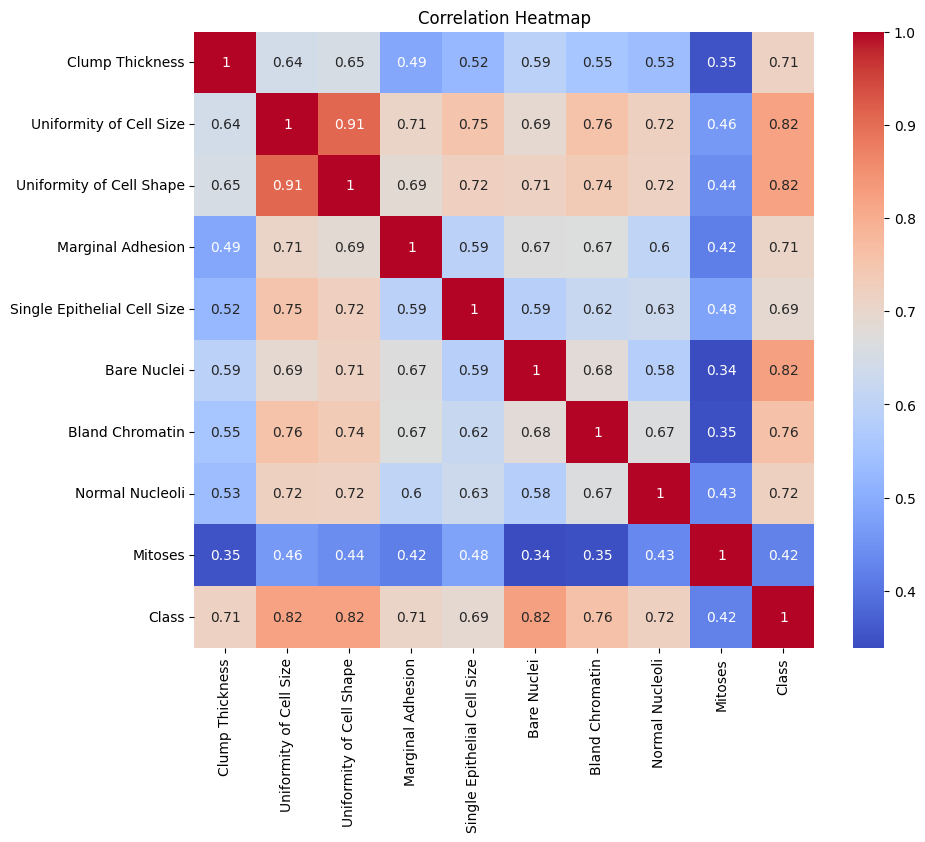

Clump Thickness                0.714790
Uniformity of Cell Size        0.820801
Uniformity of Cell Shape       0.821891
Marginal Adhesion              0.706294
Single Epithelial Cell Size    0.690958
Bare Nuclei                    0.822696
Bland Chromatin                0.758228
Normal Nucleoli                0.718677
Mitoses                        0.423448
Name: Class, dtype: float64


In [138]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Load the breast cancer dataset
df = pd.read_csv('breast_cancer.csv')

# Change the class labels from 2 and 4 to 0 and 1
data['Class'] = data['Class'].replace({2: 0, 4: 1})

# Calculate the correlation coefficients between each feature and the class
correlations = data.corr()['Class'].drop('Class')

# Print the correlation coefficients for each feature
print(correlations)

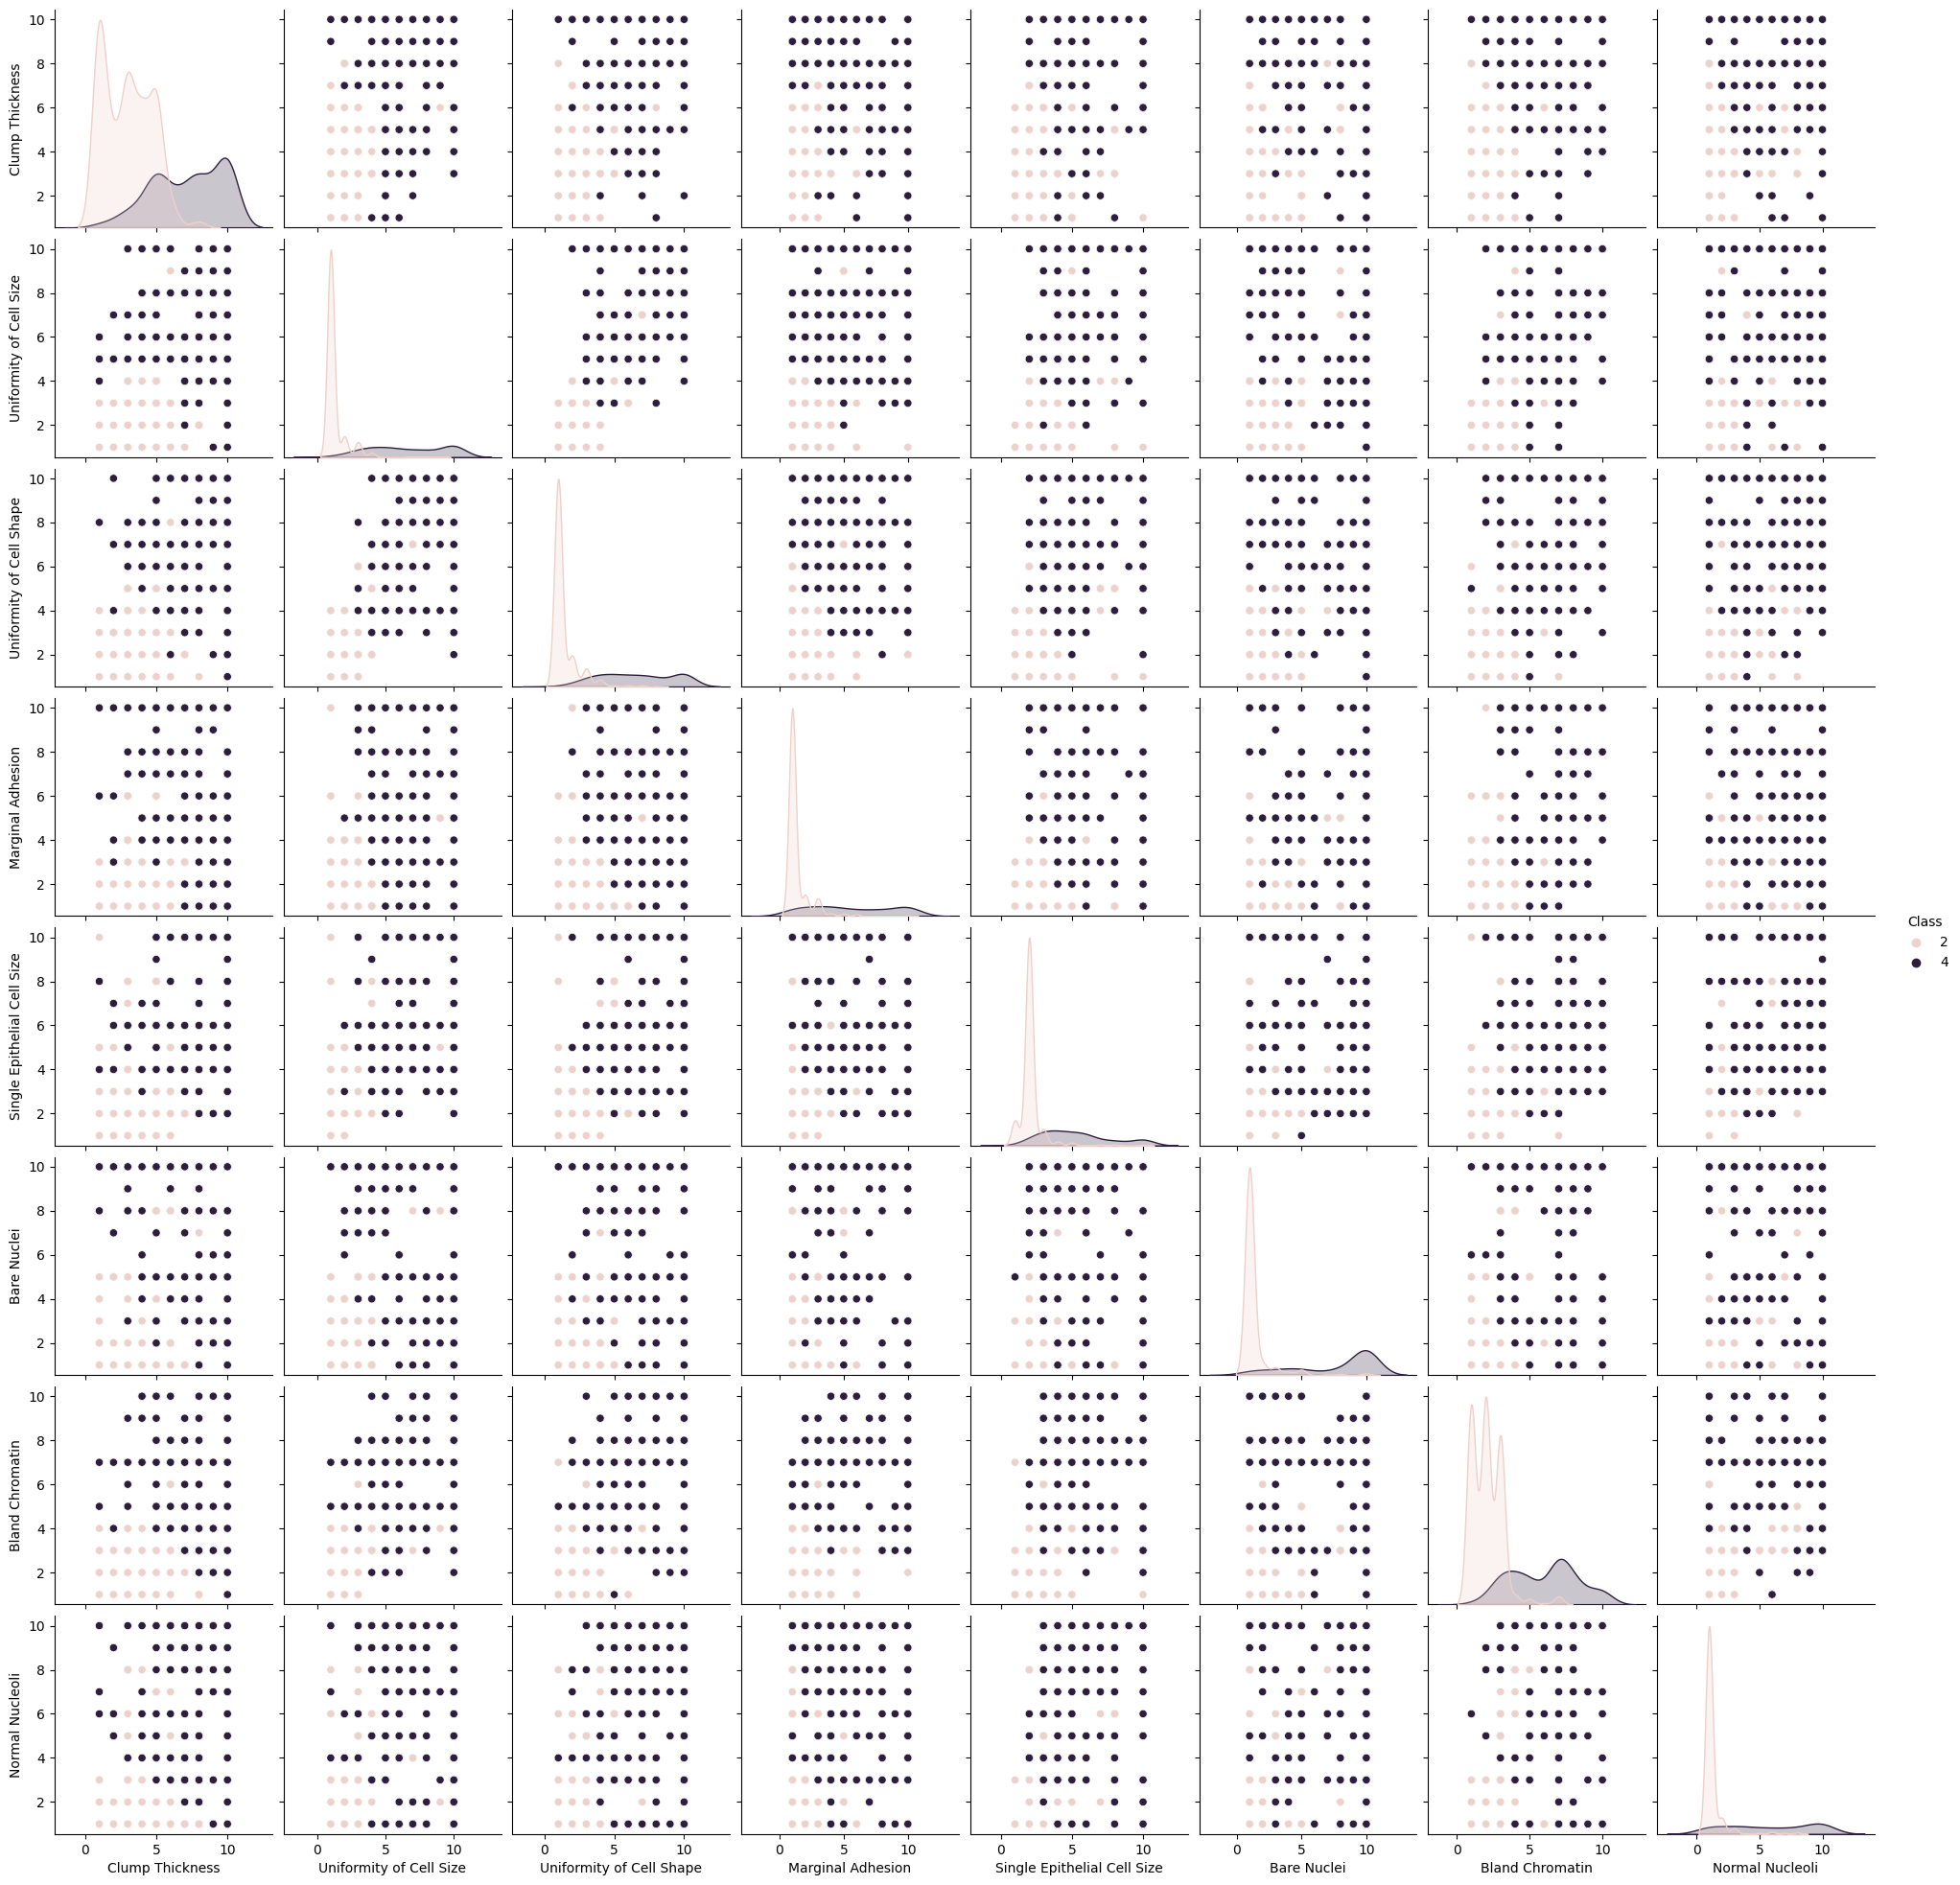

In [139]:
sns.pairplot(df, hue='Class', vars=['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli'])

# Display the plot
plt.show()

In [140]:
# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Define logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = lr.score(X_test, y_test)
print("Test accuracy:", accuracy)

# Evaluate the model on the validation set
accuracy = lr.score(X_val, y_val)
print("Validation accuracy:", accuracy)

# Define k-fold cross-validation
k = 5
scores = cross_val_score(lr, X_train, y_train, cv=k)

# Print average score across all k-folds
print("Average cross-validation score:", np.mean(scores))

from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Test accuracy: 0.9565217391304348
Validation accuracy: 0.9558823529411765
Average cross-validation score: 0.9670391993327774
[[40  1]
 [ 2 26]]
